

# Gerar Modelo de Machine Learning 
- Carregar base de dados
- Utilizado Pipeline com objetivo de realizar os passos de converter atributos categóricos em númericos com o OrdinalEncoder e definição do algoritmo utilizado para geração do modelo
- Para a geração do modelo de forma mais justa, foi utilizado o GridSearchCV para os hiperparâmetros serem gerados de forma automática, evitando assim que coloquemos o nosso sentimento para se chegar a resultados supostamente melhores.

- Foi utilizado cross_validate com validação aninhada: (Link de referência https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/)
    - Divide o conjunto de dados em n grupos de tamanhos iguais (n folds).
    - Para cada grupo, repita: (ou seja, repita n vezes)
        - Escolha um dos n grupos para ser o conjunto de teste.
        - Execute a validação cruzada de k-folds com os n – 1 grupos restantes, obtendo as medidas de performance nos k conjuntos de validação.
        - Escolha o melhor modelo da validação cruzada interna e o avalie no conjunto de teste atual, armazenando seu erro/performance.
    - Por fim temos n medidas de performance de generalização, uma para cada conjunto de teste.

- Como resultados foi impresso os melhores estimadores de cada modelo.
- Plotado gráficos de barras comparando as métricas de cada algoritmo.
- Gearada tabela comparando o desempenho dos algoritmos.

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime, date
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from collections import Counter

class AtributosNumericos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.colunasNumericas = X.select_dtypes(include='number').columns
        return self
    def transform(self, X, y=None):
        return X[self.colunasNumericas].to_numpy() 

class AtributosCategoricos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.colunasCategoricas = X.select_dtypes(exclude='number').columns
        return self
    def transform(self, X, y=None):
        return X[self.colunasCategoricas].to_numpy()

def calcularTempoAlunoCurso(entrada):
    formatoData = "%d/%m/%Y"
    dataEntrada = datetime.strptime(entrada, formatoData).date()
    today = date.today()
    return today.year - dataEntrada.year

def extrairRenda(entrada):
    if ((entrada == 'Não declarada') or (entrada == 'NÃO DECLARADA')):
        renda = 0
    else:
        if (entrada.find('>') >=0):
            
            renda = float(entrada[entrada.find('>')+1:].replace(',','.'))
        elif (entrada.find('<') >=0): 
            renda = float(entrada[entrada.find('<=')+2:].replace(',','.'))
        else:
            renda = entrada
    return renda    

class AtributosDesejados(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.colunasIndesejadas = ['Aluno','InstituicaoEducacional','TipoLocalizacao']
        #self.colunasIndesejadas = ['Aluno','InstituicaoEducacional']
        return self
    def transform(self, X, y=None):
        Xdrop = X.drop(self.colunasIndesejadas,axis=1)
        #Xdrop['Matricula'] = Xdrop['Matricula'].apply(calcularTempoAlunoCurso)
        #Xdrop['Idade'] = Xdrop['Idade']/10
        if 'Renda' in X:
            X['Renda'] = X['Renda'].apply(extrairRenda)
        return Xdrop      

def maisFrequente(y):
    return Counter(y.flat).most_common(1)[0][0]

class ZeroR():
    def fit(self, X, y):
        self.resposta = maisFrequente(y)
    def predict(self, X):
        y = np.empty((X.shape[0]))
        y[:] = self.resposta
        return y

# Funções auxiliares

In [42]:
import math

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

# Carregando dados do dataset

In [43]:
import numpy as np
import pandas as pd
import math

#Parametros de arquivos base 1
arquivoBase = './dados/pnp2020/RepositorioPnp2020-ifes.csv'
separadorCsvBase=';'
arquivoSituacoesEvasaoBase='./dados/pnp2020/situacoes.csv'
separadorCsvSituacaoesEvasao=';'

#Parametros de arquivos base 2
# arquivoBase = './dados/censo2020/RepositorioCenso2020-Ufes.csv'
# separadorCsvBase=';'
# arquivoSituacoesEvasaoBase='./dados/censo2020/situacoes.csv'
# separadorCsvSituacaoesEvasao=';'

#Ler Base de dados
df=pd.read_csv(arquivoBase,separadorCsvBase)


#Ler situações que são consideradas evasão
situacoes_evasao = pd.read_csv(arquivoSituacoesEvasaoBase,separadorCsvSituacaoesEvasao)
situacoes_evasao=situacoes_evasao['SituacaoEvasao'].to_numpy()

y = df['SituacaoMatricula']
X = df.drop(['SituacaoMatricula'],axis=1)

X




,Aluno,Idade,Genero,CorRaca,Curso,InstituicaoEducacional,GrauAcademico,ModalidadeEnsino,Turno,GrandeAreaConhecimento,AreaConhecimento,Matricula
0,62584164,20,MASCULINO,BRANCA,ENGENHARIA MECÂNICA,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,NÃO APLICÁVEL (EAD),"Engenharia, produção e construção",Engenharia mecânica e metalurgia,01JAN2019
1,62562984,20,MASCULINO,NÃO DECLARADA,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,VESPERTINO,Computação e Tecnologias da Informação e Comun...,Ciência da computação,01JAN2019
2,69583968,20,MASCULINO,BRANCA,ESTATÍSTICA,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,MATUTINO,"Ciências naturais, matemática e estatística",Estatística,01JAN2017
3,62585506,28,MASCULINO,PARDA,ENGENHARIA CIVIL,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,NÃO APLICÁVEL (EAD),"Engenharia, produção e construção",Engenharia civil e construção,01JUL2013
4,70506861,23,FEMININO,BRANCA,MATEMÁTICA,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,LICENCIATURA,PRESENCIAL,NÃO APLICÁVEL (EAD),Educação,Formação de professores em áreas específicas (...,01JUL2014
...,...,...,...,...,...,...,...,...,...,...,...,...
27083,67052831,21,MASCULINO,PARDA,MATEMÁTICA,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,LICENCIATURA,PRESENCIAL,NÃO APLICÁVEL (EAD),Educação,Formação de professores em áreas específicas (...,01JAN2018
27084,62566237,28,MASCULINO,BRANCA,ENGENHARIA CIVIL,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,NÃO APLICÁVEL (EAD),"Engenharia, produção e construção",Engenharia civil e construção,01JUL2015
27085,62559593,34,FEMININO,BRANCA,ENGENHARIA CIVIL,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,NÃO APLICÁVEL (EAD),"Engenharia, produção e construção",Engenharia civil e construção,01JUL2011
27086,62602668,31,MASCULINO,BRANCA,ENGENHARIA CIVIL,UNIVERSIDADE FEDERAL DO ESPÍRITO SANTO,BACHARELADO,PRESENCIAL,NÃO APLICÁVEL (EAD),"Engenharia, produção e construção",Engenharia civil e construção,01JAN2010


# Definindo parâmetros de algoritmos de machine learning

In [44]:
from sklearn.metrics import accuracy_score, make_scorer, precision_score, f1_score, recall_score,fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, ExtraTreesClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Pârametros de desempenho
numJobs = 5

#Parâmetros cross-validate número de folds
kcvInterno = 5
kcvExterno = 5

#Parâmetros de avaliação dos classificadores
scoringClassificacao = {'precision': make_scorer(precision_score, average='macro'), 'accuracy': make_scorer(accuracy_score), 
                        'f1': make_scorer(f1_score), 'recall': make_scorer(recall_score),'f-beta': make_scorer(fbeta_score, beta=0.6)}

refitClassificacao = 'accuracy'
resultAcurracy = 'test_accuracy'
resultPrecision = 'test_precision'
resultRecall = 'test_recall'
resultf1 = 'test_f1'
#Inicializando modelos e hiperparâmetros
models = {}
parametros = {}

models['ZeroR'] = ZeroR()
parametros['ZeroR'] ={}

models['Decision Trees'] = DecisionTreeClassifier()
parametros['Decision Trees'] = {'alg__criterion': ['gini','entropy'],
                                'alg__max_features': [None,'sqrt'],}

models['KNN'] = KNeighborsClassifier(n_jobs=numJobs)
parametros['KNN'] = {'alg__metric': ['minkowski','euclidean'],
                      'alg__n_neighbors': [5,7,9,15]}

models['Random Forest'] = RandomForestClassifier(n_jobs=numJobs)
parametros['Random Forest'] = {
                               'alg__criterion': ['gini','entropy'],
                               'alg__n_estimators': [100,500],
                               }              

models['Extra Trees'] = ExtraTreesClassifier(n_jobs=numJobs)
parametros['Extra Trees'] = {
                             'alg__criterion': ['gini','entropy'],
                             'alg__n_estimators': [100,500]}

models['Ada Boost'] = AdaBoostClassifier()
parametros['Ada Boost'] = {'alg__n_estimators': [50,500],
                            'alg__base_estimator': [LinearSVC(),LogisticRegression(n_jobs=numJobs)],
                            'alg__algorithm': ['SAMME.R','SAMME'],
                            'alg__learning_rate':[1.0,0.15],
                            }                                 

models['Bagging'] = BaggingClassifier(n_jobs=numJobs)
parametros['Bagging'] = {'alg__n_estimators': [10,15,30],
                          'alg__base_estimator': [LinearSVC(),LogisticRegression(n_jobs=numJobs)],
                          'alg__max_features': [1.0,0.5],
                          }  

models['Gradient Boosting'] = GradientBoostingClassifier()
parametros['Gradient Boosting'] = {
                     'alg__criterion': ['friedman_mse','mse'],
                     'alg__max_features':  [None,'sqrt']}
                                                                                         

# Pré processamento
- Transformando o rotulo em binário

In [45]:
import numpy as np

y_binary = np.where(np.isin(y,situacoes_evasao),1,0 )

#Verificando balancelamento da base
print(np.count_nonzero(y_binary==1))
print(np.count_nonzero(y_binary==0))


2554
24534


# Transformação de dados e executando validação cruzada ainhada para o algoritmos de classificação

Transformação de dados:
- SimpleImputer: Para preencher valores ausente.
> **strategy**='most_frequent'. Adota a estratégia de preencher com valores mais frequentes / **copy**=False. Indica se é para fazer uma cópia ou se é para substituir o valor na coluna
- OrdinalEncoder: Codifique recursos categóricos em um array de inteiros. Transforma características discretas em inteiros ordinais.
> **handle_unknown**='use_encoded_value'. Estratégia adotada ao encontrar categorias não conhecidas. A estratégia use_encoded_value atribuí o valor definido no parâmetro a seguir  / **unknown_value**=-1. Indica se é para fazer uma cópia ou se é para substituir o valor na coluna
- Normalizer: Normaliza os dados, está sendo utilizada a norma l2

Validação cruzada aninhada:
- GridSearchCV: Pesquisa exaustiva sobre valores de parâmetros especificados para um estimador.
> **cv** - Defini a quantidade de folds que serão geradas para fazer a validação cruzada. / **refit** - quando utilizado vária métricas, aqui é definida qual das métricas serão utilizadas para ajuste do modelo para encontrar os melhores parâmetros. / **scoring** - definir quais as métricas serão calculadas. / **param_grid** - lista de hiperparâmetros que serão avalidados.

- cross_validate: Avalie as métricas por validação cruzada
> **etimator** - aqui é passado o modelo difinido pelo GridSearchCV, por isso é que se tem uma validação cruzada aninhada. / **n_jobs** - Número de jobs a serem executados em paralelo.

In [46]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, Normalizer,OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import time

accuracy, precision, recall, f1, scoresEstimadores, indicesMelhoresEstimadores = {}, {}, {},{},{},{}

transformer = FeatureUnion([
        ('pipenum', Pipeline([
            ('atributos_numericos', AtributosNumericos()),
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', Normalizer())
        ])),
        ('pipecat', Pipeline([
            ('atributos_categoricos', AtributosCategoricos()),
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)),
            #('encoder', OneHotEncoder(handle_unknown ='ignore')),
            ('scaler', Normalizer())  
        ]))
    ])


for key in models.keys():

    pipetotal = Pipeline([
        ('balanceamento',RandomUnderSampler(sampling_strategy='not minority')),
        ('atributosDesejados', AtributosDesejados()),
        ('trataAtributos', transformer),
        ('alg', models[key])
    ])

    print('Treinando '+key+' '+time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))
    # cross validation interno (variando conjunto de validação)
    modelo = GridSearchCV(pipetotal, parametros[key], scoring=scoringClassificacao, refit=refitClassificacao,cv=kcvInterno)
    print('Após GridSearchCV '+key+' '+time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))
    # cross validation externo (variando conjunto de teste)
    scores = cross_validate(modelo, X, y_binary,cv=kcvExterno,n_jobs=-1, scoring=scoringClassificacao,return_estimator=True,error_score='raise')

    print('Após cross_validate '+key+' '+time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

    scoresEstimadores[key] = scores['estimator']
    indicesMelhoresEstimadores[key] = np.argmax(scores[resultf1])
    accuracy[key] = truncate(np.mean(scores[resultAcurracy]),2)
    precision[key] = truncate(np.mean(scores[resultPrecision]),2)
    f1[key] = truncate(np.mean(scores[resultf1]),2)
    recall[key] = truncate(np.mean(scores[resultRecall]),2)


Treinando ZeroR 2022-12-04 15:25:35
Após GridSearchCV ZeroR 2022-12-04 15:25:35
Após cross_validate ZeroR 2022-12-04 15:25:44
Treinando Decision Trees 2022-12-04 15:25:44
Após GridSearchCV Decision Trees 2022-12-04 15:25:44
Após cross_validate Decision Trees 2022-12-04 15:25:57
Treinando KNN 2022-12-04 15:25:57
Após GridSearchCV KNN 2022-12-04 15:25:57
Após cross_validate KNN 2022-12-04 15:26:10
Treinando Random Forest 2022-12-04 15:26:10
Após GridSearchCV Random Forest 2022-12-04 15:26:10
Após cross_validate Random Forest 2022-12-04 15:28:23
Treinando Extra Trees 2022-12-04 15:28:23
Após GridSearchCV Extra Trees 2022-12-04 15:28:23
Após cross_validate Extra Trees 2022-12-04 15:29:20
Treinando Ada Boost 2022-12-04 15:29:20
Após GridSearchCV Ada Boost 2022-12-04 15:29:20
Após cross_validate Ada Boost 2022-12-04 15:30:58
Treinando Bagging 2022-12-04 15:30:58
Após GridSearchCV Bagging 2022-12-04 15:30:58
Após cross_validate Bagging 2022-12-04 15:31:51
Treinando Gradient Boosting 2022-12-0

# Imprimindo composição dos melhores modelos para cada algoritmo

########## Melhor modelo com: ZeroR##########

Pipeline(steps=[('balanceamento',
                 RandomUnderSampler(sampling_strategy='not minority')),
                ('atributosDesejados', AtributosDesejados()),
                ('trataAtributos',
                 FeatureUnion(transformer_list=[('pipenum',
                                                 Pipeline(steps=[('atributos_numericos',
                                                                  AtributosNumericos()),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('scaler',
                                                                  Normalizer())])),
                                                ('pipecat',
                                                 Pipeline(steps=[('atributos_categoricos',
                       

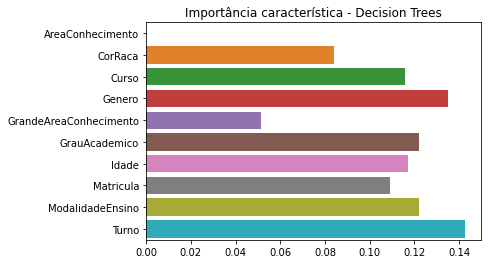

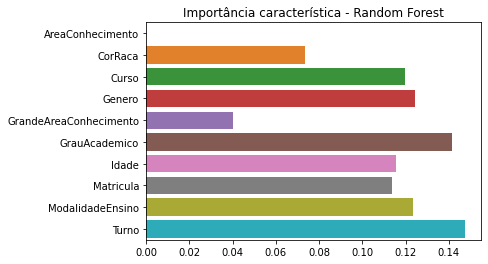

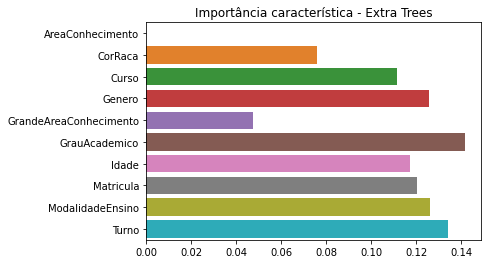

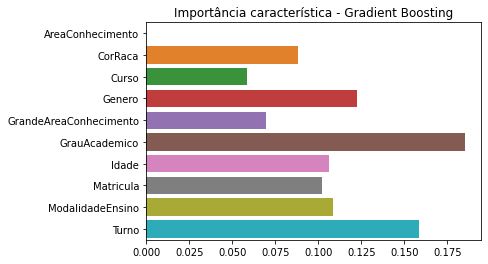

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
bests,bestsEstimators  = {},{}
j = 0
for key in models.keys():
  print('########## Melhor modelo com: '+key+'##########'+'\n')
  i = 0
  for estimator in scoresEstimadores[key]:
    #print(estimator.best_params_)
    bests[i] = estimator.best_estimator_
    i = i + 1
  bestsEstimators[key] = bests[indicesMelhoresEstimadores[key]]
  print(bests[indicesMelhoresEstimadores[key]])
  
  model = bestsEstimators[key]['alg']

  if hasattr(model, 'feature_importances_'):
    j=j+1
    plt.figure(j)
    importances = pd.Series(data=model.feature_importances_, index=np.setdiff1d(X.columns.values, ['Aluno','TipoLocalizacao','InstituicaoEducacional']))
    sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância característica - '+key)
  print('*******************************'+'\n\n\n')



# Avaliação dos modelos

Gráficos comparando as métricas de avaliação


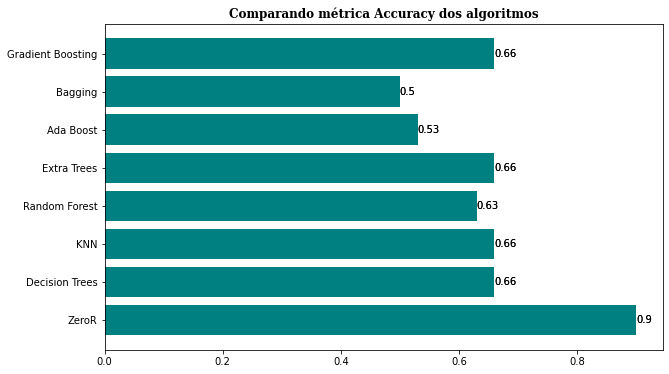

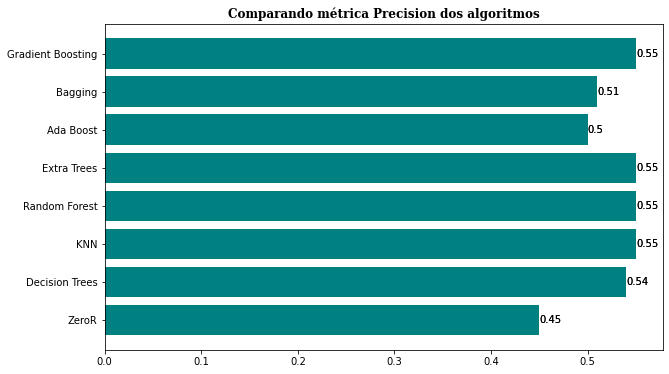

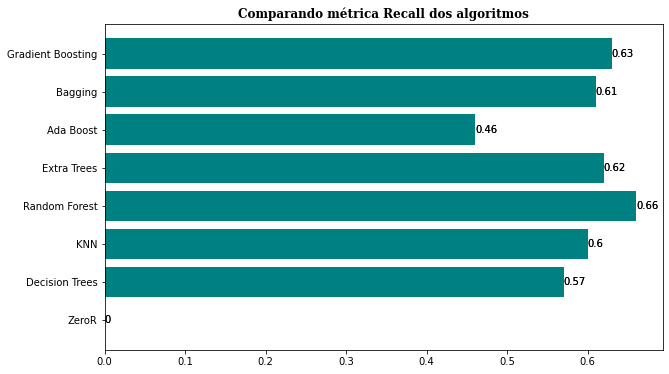

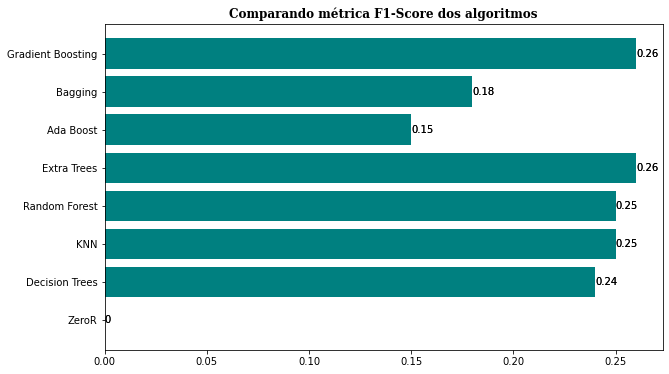

Tabela comparando as métricas de avaliação


,Accuracy,Precision,Recall,F1-Score
ZeroR,0.900000,0.450000,0.000000,0.000000
Decision Trees,0.660000,0.540000,0.570000,0.240000
KNN,0.660000,0.550000,0.600000,0.250000
Random Forest,0.630000,0.550000,0.660000,0.250000
Extra Trees,0.660000,0.550000,0.620000,0.260000
Ada Boost,0.530000,0.500000,0.460000,0.150000
Bagging,0.500000,0.510000,0.610000,0.180000
Gradient Boosting,0.660000,0.550000,0.630000,0.260000


In [48]:
import matplotlib.pyplot as plt

colunas=list(models.keys())
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision','Recall','F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['F1-Score'] = f1.values()
df_model['Recall'] = recall.values()


print('Gráficos comparando as métricas de avaliação')
for coluna in df_model:
    valores=list(df_model[coluna])

    fig, ax = plt.subplots()
    bars = ax.barh(colunas, valores,color='#008080' )
    fig.set_size_inches(10,6)
    ax.bar_label(bars)

    plt.title("Comparando métrica "+coluna+" dos algoritmos", 
          position=(0.5, 0.9),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})

    for bars in ax.containers:
        ax.bar_label(bars)
    plt.show()

print('Tabela comparando as métricas de avaliação')
df_model.style.highlight_max(color = 'lightgreen', axis = 0)


# Salvando os modelos com pickle

In [49]:
import pickle
from sklearn.metrics import accuracy_score

for key in models.keys():
    saved_model = pickle.dump(bestsEstimators[key], open(key+'.pkl', 'wb'))
